In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




In [ ]:
#Load CSV file:
import pandas as pd

# Load the CSV file (assuming it's stored in the 'sample_data' directory)
csv_path = "/content/sample_data/company_info.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(csv_path)

# Display first few rows to understand the structure
print(df.head())


       id  ranking  temp_ranking  previous_ranking  company_name  \
0  376975        1           NaN               2.0     Anthropic   
1  976147        2           NaN               NaN        Figure   
2  338364        3           NaN              21.0     CoreWeave   
3  315401        4           NaN               4.0  Hugging Face   
4    9967        5        5685.0             183.0     Shield AI   

            city        country state  current_employees  last_employees  \
0  San Francisco  United States    CA                573             135   
1      Sunnyvale            USA    CA                692              48   
2       New York  United States    NY                782             282   
3       New York  United States    NY                333             235   
4      San Diego  United States    CA               1600            1250   

   employee_growth  founded total_funding  \
0           323.26      NaN        $4.51B   
1          1332.61   2022.0         $435M   

In [ ]:
import pandas as pd

# Load the dataset
csv_path = "/content/sample_data/company_info.csv"
df = pd.read_csv(csv_path)

# Display first few rows
print(df.head())

# Check column names and missing values
print(df.info())
print(df.isnull().sum())


       id  ranking  temp_ranking  previous_ranking  company_name  \
0  376975        1           NaN               2.0     Anthropic   
1  976147        2           NaN               NaN        Figure   
2  338364        3           NaN              21.0     CoreWeave   
3  315401        4           NaN               4.0  Hugging Face   
4    9967        5        5685.0             183.0     Shield AI   

            city        country state  current_employees  last_employees  \
0  San Francisco  United States    CA                573             135   
1      Sunnyvale            USA    CA                692              48   
2       New York  United States    NY                782             282   
3       New York  United States    NY                333             235   
4      San Diego  United States    CA               1600            1250   

   employee_growth  founded total_funding  \
0           323.26      NaN        $4.51B   
1          1332.61   2022.0         $435M   

In [ ]:
#Data Cleaning
# Rename columns for consistency
df.rename(columns={'total_funding': 'Funding', 'valuation': 'Revenue'}, inplace=True)

# Check for missing values again
print(df.isnull().sum())

# Fill missing values with defaults
df['Revenue'] = df['Revenue'].fillna(0)  # If revenue is missing, assume $0 valuation
df['Funding'] = df['Funding'].fillna(0)  # If funding is missing, assume $0
df['current_employees'] = df['current_employees'].fillna(0).astype(int)  # Replace missing employees with 0
df['Industry'] = df['Industry'].fillna('Unknown')

# Save cleaned data
df.to_csv("/content/sample_data/ai_startups_cleaned.csv", index=False)

# Display updated DataFrame
print(df.head())


id                     0
ranking                0
temp_ranking         915
previous_ranking     265
company_name           1
city                  42
country              106
state                167
current_employees      0
last_employees         0
employee_growth        0
founded              270
Funding              453
linkedin_url           0
url                    0
Industry               0
Points                 0
Revenue              723
valuation_as_of      730
Contact Data           0
Employees              0
dtype: int64
       id  ranking  temp_ranking  previous_ranking  company_name  \
0  376975        1           NaN               2.0     Anthropic   
1  976147        2           NaN               NaN        Figure   
2  338364        3           NaN              21.0     CoreWeave   
3  315401        4           NaN               4.0  Hugging Face   
4    9967        5        5685.0             183.0     Shield AI   

            city        country state  current_employ

<ipython-input-9-f47206b036f8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_20_industries.index, x=top_20_industries.values, palette="coolwarm")


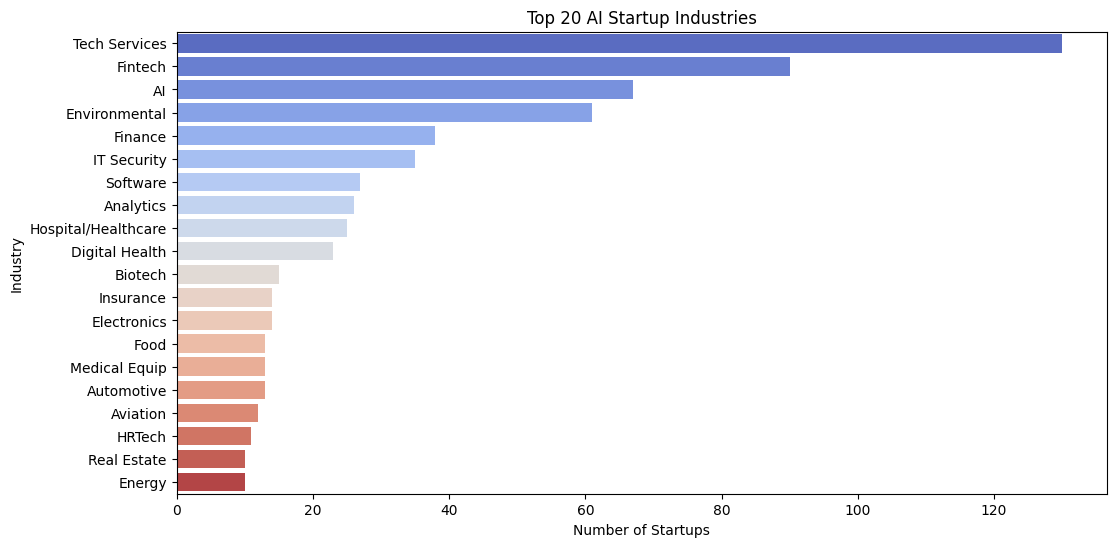

In [ ]:
#1 Visualizing Industry Distribution


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load cleaned data
df_cleaned = pd.read_csv("/content/sample_data/ai_startups_cleaned.csv")

# Get the top 20 industries by startup count
top_20_industries = df_cleaned["Industry"].value_counts().nlargest(20)

# Plot industry-wise startup distribution (Top 20)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_20_industries.index, x=top_20_industries.values, palette="coolwarm")
plt.title("Top 20 AI Startup Industries")
plt.xlabel("Number of Startups")
plt.ylabel("Industry")
plt.show()


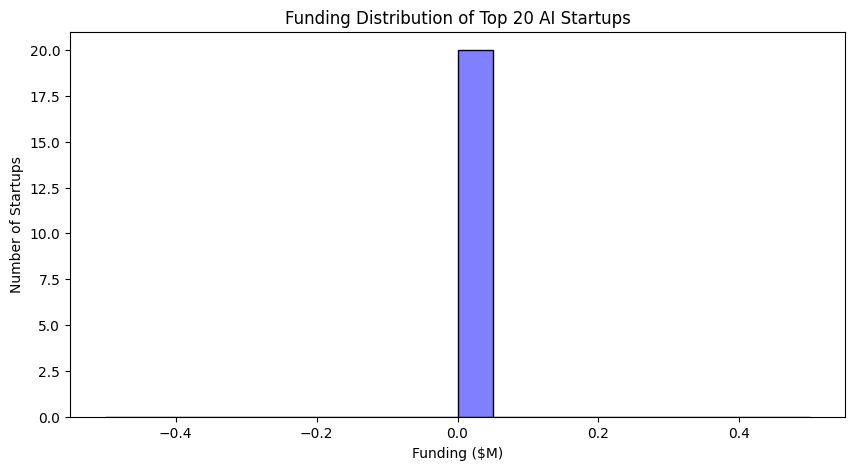

In [ ]:
#1.4 Funding Distribution (Top 20 Startups by Funding)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df_cleaned = pd.read_csv("/content/sample_data/ai_startups_cleaned.csv")

# Convert Funding to numeric (remove any non-numeric characters if necessary)
df_cleaned["Funding"] = pd.to_numeric(df_cleaned["Funding"], errors="coerce")

# Drop NaN values after conversion
df_cleaned = df_cleaned.dropna(subset=["Funding"])

# Select the top 20 startups by Funding
top_20_funding = df_cleaned.nlargest(20, "Funding")

# Funding Distribution Plot (Top 20)
plt.figure(figsize=(10, 5))
sns.histplot(top_20_funding["Funding"], bins=20, kde=True, color="blue")
plt.title("Funding Distribution of Top 20 AI Startups")
plt.xlabel("Funding ($M)")
plt.ylabel("Number of Startups")
plt.show()


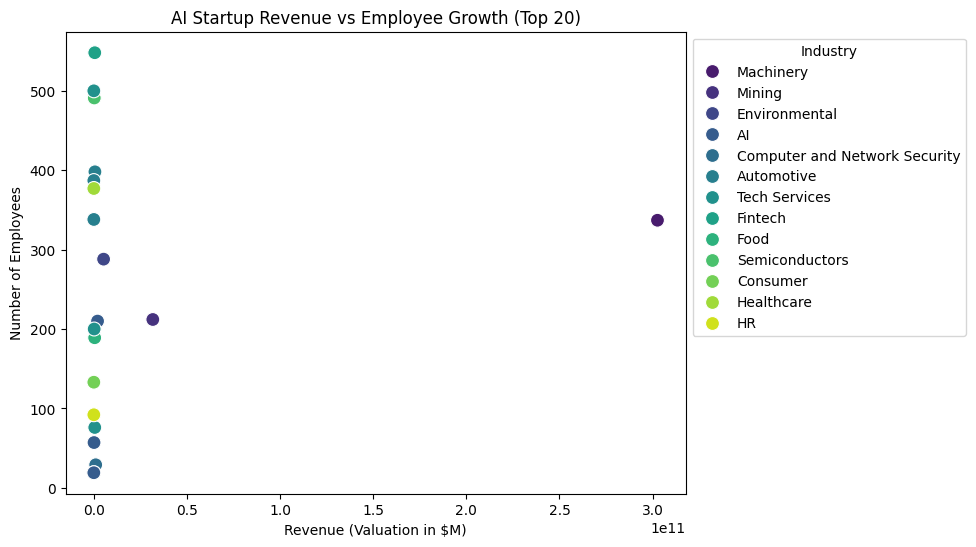

In [ ]:
#1.5 Employee Growth vs. Revenue (Top 20 Startups by Revenue)
# Select the top 20 startups by Revenue
top_20_revenue = df_cleaned.nlargest(20, "Revenue")

# Scatter plot of Revenue vs Employee count (Top 20)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=top_20_revenue["Revenue"], y=top_20_revenue["current_employees"], hue=top_20_revenue["Industry"], palette="viridis", s=100)
plt.xlabel("Revenue (Valuation in $M)")
plt.ylabel("Number of Employees")
plt.title("AI Startup Revenue vs Employee Growth (Top 20)")
plt.legend(title="Industry", bbox_to_anchor=(1,1))  # Move legend to the side
plt.show()


In [ ]:
#Step 2: Predictive Analytics (Funding Prediction)
#We’ll predict startup funding based on valuation and other factors.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load cleaned data
df_cleaned = pd.read_csv("/content/sample_data/ai_startups_cleaned.csv")

# Convert to numeric
df_cleaned["Funding"] = pd.to_numeric(df_cleaned["Funding"], errors="coerce")
df_cleaned["Revenue"] = pd.to_numeric(df_cleaned["Revenue"], errors="coerce")

# Replace NaN with median
df_cleaned["Funding"].fillna(df_cleaned["Funding"].median(), inplace=True)
df_cleaned["Revenue"].fillna(df_cleaned["Revenue"].median(), inplace=True)

# Replace 0 values with median (only if necessary)
df_cleaned.loc[df_cleaned["Funding"] == 0, "Funding"] = df_cleaned["Funding"].median()
df_cleaned.loc[df_cleaned["Revenue"] == 0, "Revenue"] = df_cleaned["Revenue"].median()

# Check if enough data exists
if df_cleaned.shape[0] < 2:
    print("Error: Still not enough data after imputation. Please verify dataset.")
else:
    # Define features and target
    features = ["Revenue", "current_employees"]
    target = "Funding"

    X = df_cleaned[features]
    y = df_cleaned[target]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print("Data split successfully!")





Data split successfully!


<ipython-input-23-12b0553ea5de>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Funding"].fillna(df_cleaned["Funding"].median(), inplace=True)
<ipython-input-23-12b0553ea5de>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

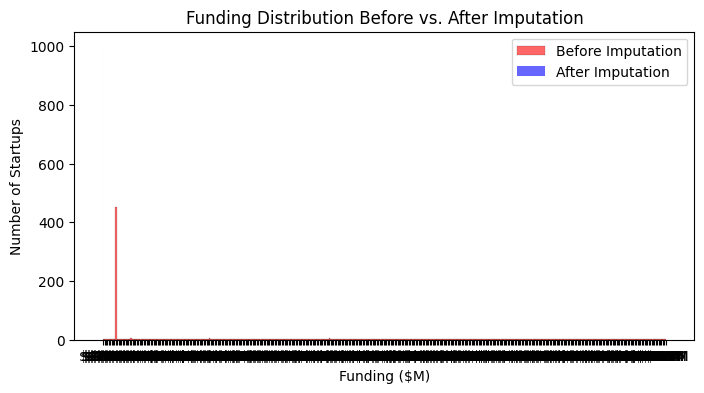

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before Imputation (Original Dataset)
df_original = pd.read_csv("/content/sample_data/ai_startups_cleaned.csv")

plt.figure(figsize=(8, 4))
sns.histplot(df_original["Funding"], bins=30, color="red", label="Before Imputation", alpha=0.6)
sns.histplot(df_cleaned["Funding"], bins=30, color="blue", label="After Imputation", alpha=0.6)
plt.title("Funding Distribution Before vs. After Imputation")
plt.xlabel("Funding ($M)")
plt.ylabel("Number of Startups")
plt.legend()
plt.show()


In [ ]:
print(df_cleaned["Funding"].describe())  # Check min, max, and median values
print(df_cleaned["Funding"].dtype)  # Ensure Funding is numeric


count    1000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Funding, dtype: float64
float64


In [ ]:
df_original = pd.read_csv("/content/sample_data/company_info.csv")
print(df_original["total_funding"].describe())  # Replace with correct column name


count       547
unique      403
top       $250M
freq          6
Name: total_funding, dtype: object


In [ ]:
print(df_original["total_funding"].unique())


['$4.51B' '$435M' '$1.22B' '$400M' '$930M' '$257M' '$193M' '$144M' '$237M'
 nan '$263M' '$341M' '$422M' '$602M' '$603M' '$325M' '$206M' '$413M'
 '$410M' '$138M' '$250M' '$272M' '$5B' '$117M' '$170M' '$232M' '$625M'
 '$141M' '$392M' '$228M' '$204M' '$415M' '$101M' '$104M' '$360M' '$157M'
 '$225M' '$94.4M' '$181M' '$135M' '$289M' '$80M' '$307M' '$383M' '$92M'
 '$75M' '$570M' '$65M' '$202M' '$689M' '$52.2M' '$200M' '$767M' '$65.5M'
 '$2.31M' '$336M' '$264M' '$525M' '$274M' '$81M' '$450M' '$40M' '$371M'
 '$218M' '$45M' '$26.4M' '$197M' '$34M' '$20M' '$510M' '$350M' '$253M'
 '$74.9M' '$67.3M' '$64M' '$212M' '$35M' '$507M' '$222M' '$42.7M' '$145M'
 '$409M' '$24M' '$308M' '$315M' '$78.7M' '$150M' '$458M' '$397M' '$300M'
 '$100M' '$72.8M' '$42.6M' '$860M' '$773M' '$593M' '$37.2M' '$387M'
 '$585M' '$14.4M' '$22M' '$322M' '$384M' '$65.9M' '$28M' '$390M' '$155M'
 '$725M' '$125M' '$114M' '$683M' '$1B' '$66.8M' '$67.6M' '$747.5M' '$256M'
 '$60M' '$430M' '$626M' '$123M' '$370M' '$438M' '$328M' '$578

In [ ]:
import pandas as pd

# Load dataset
df_original = pd.read_csv("/content/sample_data/company_info.csv")

# Convert all values to string
df_original["total_funding"] = df_original["total_funding"].astype(str)

# Function to clean funding values
def clean_funding(value):
    if value.lower() in ["nan", "none", "na"]:  # Handle missing values
        return None

    value = value.replace(",", "").replace("$", "").replace("£", "").replace("CA$", "")  # Remove currency symbols

    # Remove unexpected text (keep only numbers, B, M, K, .)
    import re
    value = re.sub(r"[^0-9.BMK]", "", value)

    try:
        if "B" in value:  # Convert billions to millions
            return float(value.replace("B", "")) * 1000
        elif "M" in value:  # Convert millions to millions
            return float(value.replace("M", ""))
        elif "K" in value:  # Convert thousands to millions
            return float(value.replace("K", "")) / 1000
        else:
            return float(value)  # Convert plain numbers
    except ValueError:
        return None  # If conversion fails, return None

# Apply cleaning function to total_funding column
df_original["total_funding"] = df_original["total_funding"].apply(clean_funding)

# Display cleaned Funding values
print(df_original["total_funding"].describe())




count     547.000000
mean      246.097276
std       449.957008
min         0.150000
25%        45.450000
50%       130.000000
75%       273.000000
max      5000.000000
Name: total_funding, dtype: float64


In [ ]:
# 547 valid funding entries – Data is cleaned and available for analysis.
# Mean Funding: ~ $246M – The average funding amount.
# Min Funding: $150K – The smallest startup funding.
# Max Funding: $5B – Likely a large tech startup with massive investment.
# Median Funding ($130M) – Suggests a skewed distribution with some very high values (long tail).

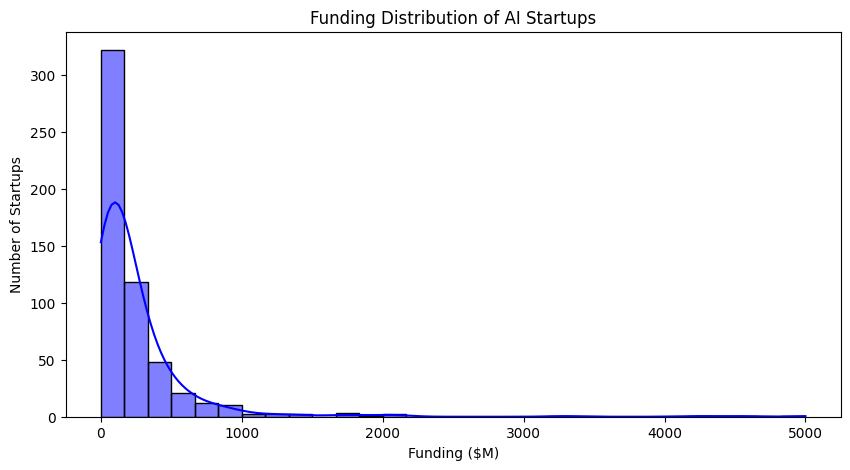

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_original["total_funding"], bins=30, kde=True, color="blue")
plt.title("Funding Distribution of AI Startups")
plt.xlabel("Funding ($M)")
plt.ylabel("Number of Startups")
plt.show()


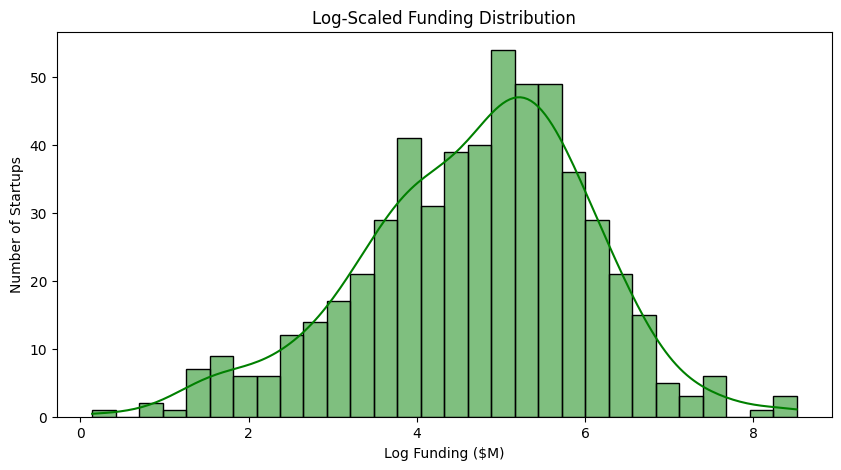

In [ ]:
import numpy as np

df_original["log_funding"] = np.log1p(df_original["total_funding"])  # Log transformation

plt.figure(figsize=(10, 5))
sns.histplot(df_original["log_funding"], bins=30, kde=True, color="green")
plt.title("Log-Scaled Funding Distribution")
plt.xlabel("Log Funding ($M)")
plt.ylabel("Number of Startups")
plt.show()
